In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
with open('daten/Schweiz.txt', 'r') as f:
    lt = f.read()
liedtext = lt

In [ ]:
# Eine Liste mit Wörtern, die nicht angezeigt werden sollen, wird generiert. 
stopwords = []

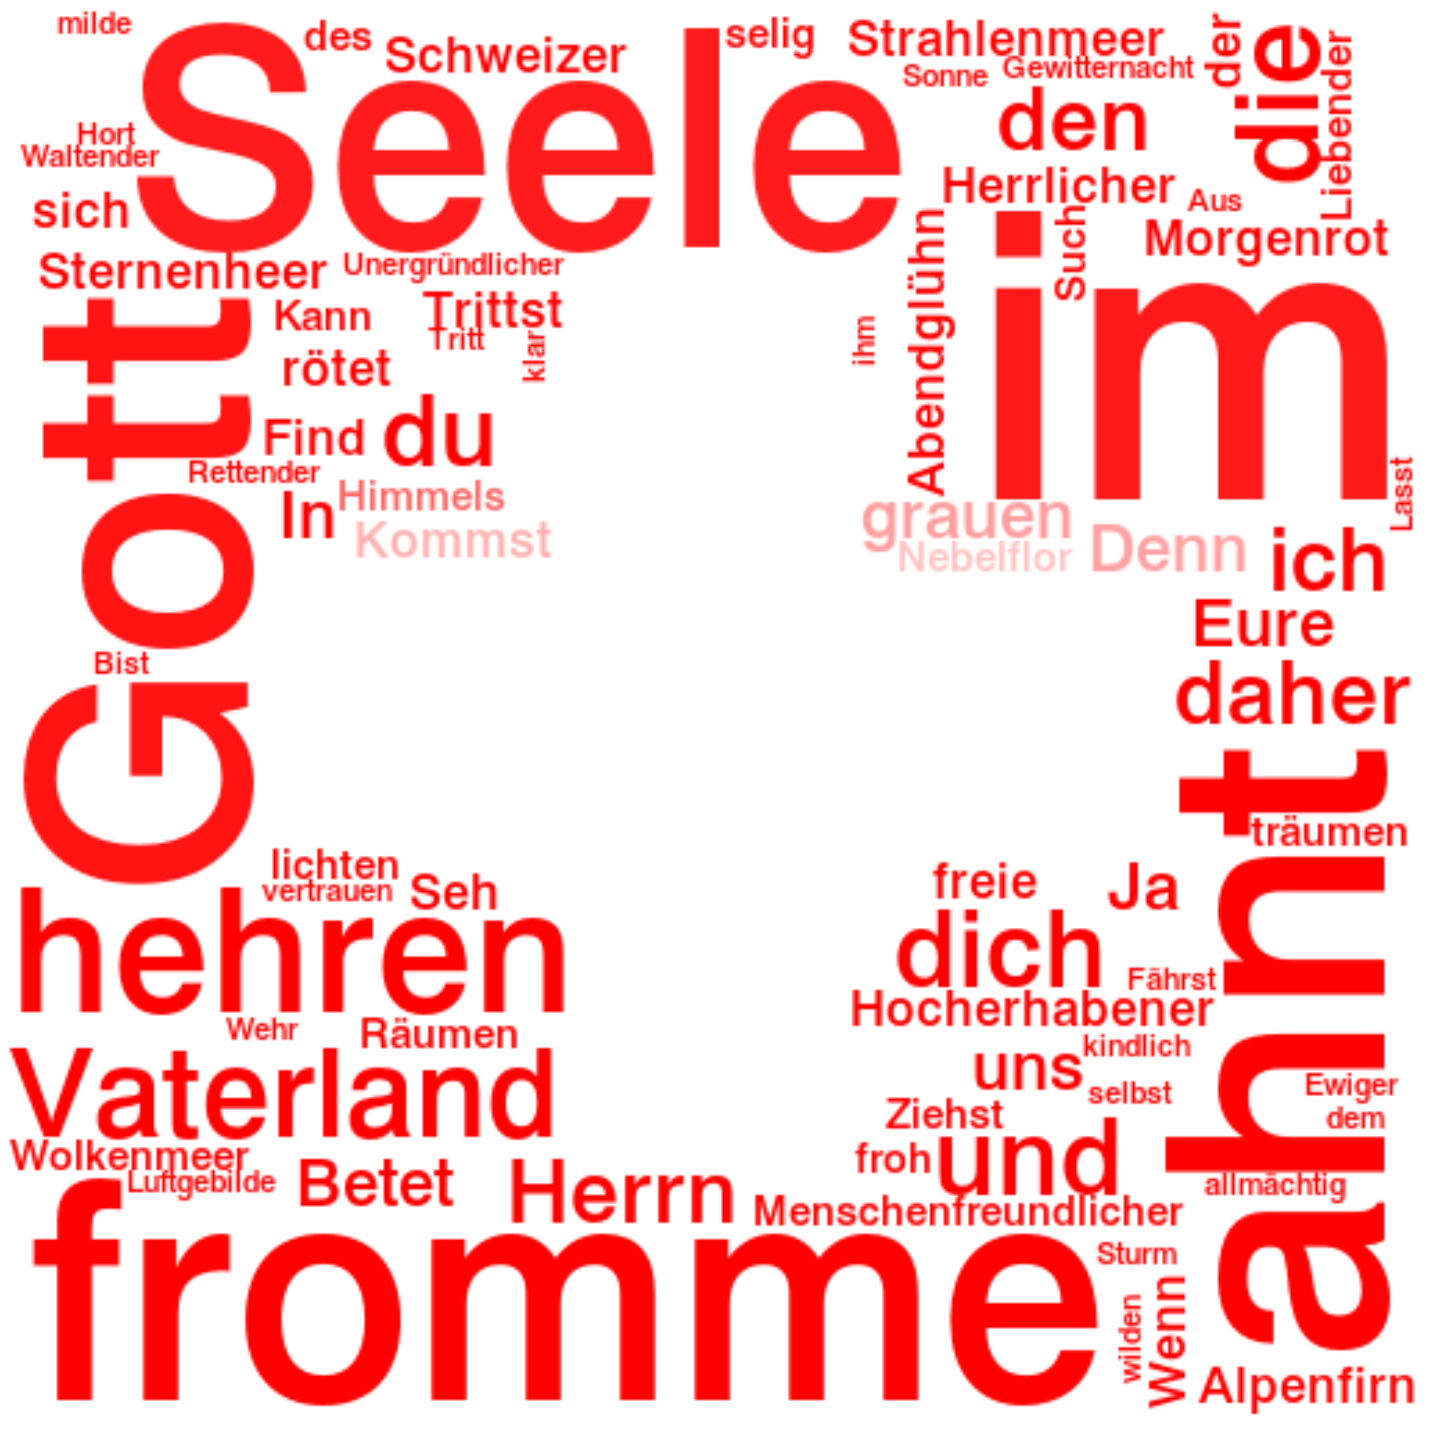

In [5]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
lt = liedtext

# Einlesen der Länderflagge
bimg = Image.open(path.join(d, "daten/img/512px-Flag_of_Switzerland.svg.png"))
bimg = bimg.convert('RGB')
mask = np.array(bimg)

wc = WordCloud(background_color='white', font_path='../../../fonts/Newhouse DT/Newhouse DT Medium_not hinted.otf', 
               collocations=False, max_words=1200, mask=mask, normalize_plurals=False, 
               stopwords=stopwords, relative_scaling=0.5, random_state=1).generate(lt)
image_colors = ImageColorGenerator(mask)

# create coloring from image
plt.figure(figsize=[20,20])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig('output/schweiz.jpg', dpi=200)
plt.show()